<a href="https://colab.research.google.com/github/Pujitha19/ExternalRestAPI/blob/master/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Modules

In [11]:
import os
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Data Directory

In [12]:
dir='/content/drive/MyDrive/dataset/Train'

# Categories

In [13]:
categories=['Not Bamboo','Bamboo']

# Loading Data

In [9]:
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)
  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    b_img=cv2.imread(imgpath,0)
    b_img=cv2.resize(b_img,(250,250))
    image = np.array(b_img).flatten()
    data.append([image,label])

# Creating Features and Labels List

In [14]:
features=[]
labels=[]
for f,l in data:
  features.append(f)
  labels.append(l)


# Splitting the data into train and test sets

In [15]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.70,random_state=12)

In [16]:
print(len(x_train))
print(len(x_test))

176
76


# **Random Forest Classifier**

In [17]:
#creating RandomForestClassifier object
ran_clf=RandomForestClassifier(n_estimators=10)

#train the model
ran_clf.fit(x_train,y_train)

#call the predict function on x_test
ran_pred=ran_clf.predict(x_test)

print("accuracy_score of random forest::")
print(accuracy_score(y_test,ran_pred))


accuracy_score of random forest::
0.5789473684210527


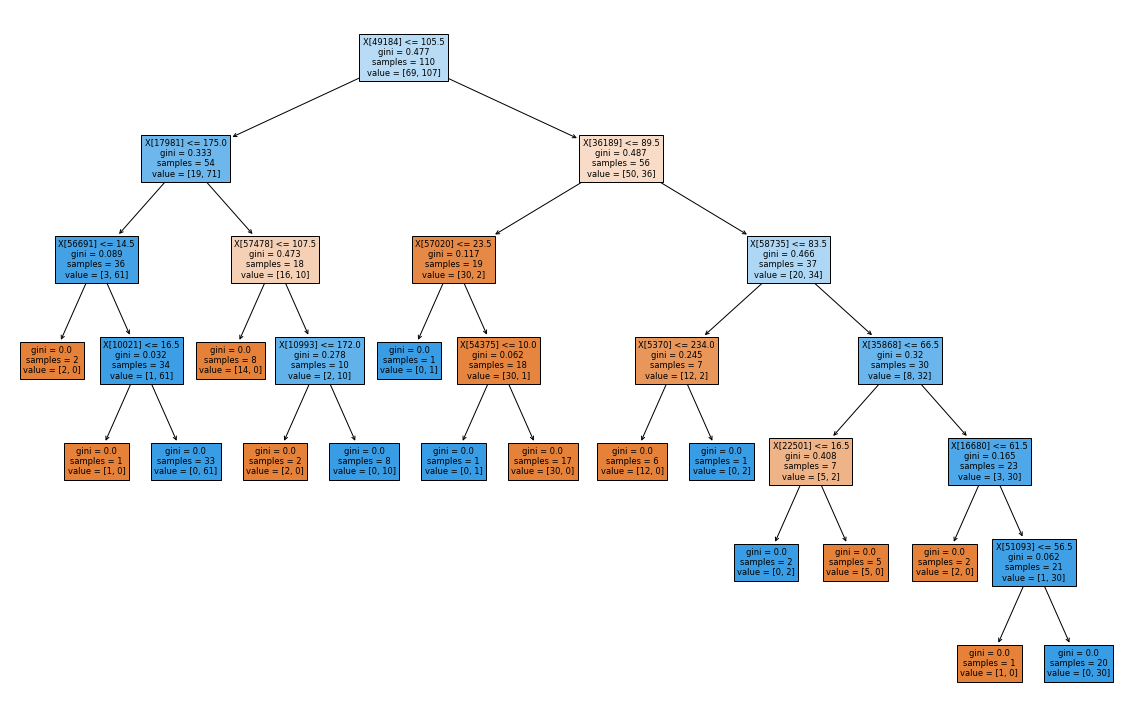

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,13))
plot_tree(ran_clf.estimators_[0],filled=True)
plt.show()

Bamboo


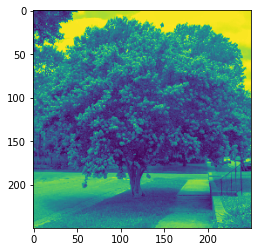

In [19]:
print(categories[ran_pred[55]])
b=x_test[55].reshape(250,250)
plt.imshow(b)
plt.show()

# **Support Vector Machine**

In [20]:
#creating SVC object
model=SVC(C=1,gamma='auto',kernel="poly")

#train the model
model.fit(x_train,y_train)

#call the predict function on x_test
svc_pred=model.predict(x_test)

print("accuracy_score of SVC::")
print(accuracy_score(y_test,svc_pred))


accuracy_score of SVC::
0.6447368421052632


Bamboo


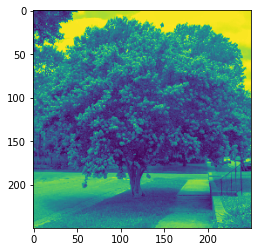

In [21]:
print(categories[svc_pred[55]])
b=x_test[55].reshape(250,250)
plt.imshow(b)
plt.show()

# **Logistic Regression**

In [22]:
#creating Logistic Regression object
lr=LogisticRegression()

#train the model
lr.fit(x_train,y_train)

#call the predict function on x_test
lr_pred=lr.predict(x_test)

print("accuracy_score of Logistic Regression::")
print(accuracy_score(y_test,lr_pred))


accuracy_score of Logistic Regression::
0.6973684210526315


Bamboo


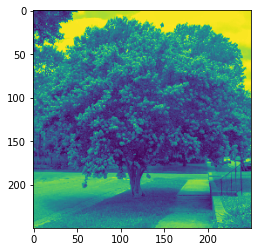

In [23]:
print(categories[lr_pred[55]])
b=x_test[55].reshape(250,250)
plt.imshow(b)
plt.show()